# Kernel logistic regression

- We will implement kernel logistic regression de novo using numpy and scipy
- all required imports have been added for you in cell 1
- here is the workflow:
   - generate 200 points on the plane in an XOR configuration and visualize it
   - build a kernel logistic model for three cases (1) ALL 200 points as landmarks, (2) landmarks chosen by kmeans clustering, (3) 4 strategically chosen landmarks
   - Test the model in each case as follows
       -create a grid of 50 x 50 test points on [-3,+3] x [-3,+3]
       - build a kernel representation of the 2500 test points 
       - use fitted logistic model to predict probability of membership in class 1 for the 2500 points
       - reshape prediction array into a 50x50 array for plotting

In [3]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots

In [4]:
# function for plotting the decision boundaries
# Z = prediction array reshaped as 50x50, X and y which are the original training data, 
# xx and yy are the grid coordinates for the test points

def plot_boundary(Z,X,y,xx,yy):
    image = plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2,colors=['k'])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)

## Generate and visualize XOR data for training

In [5]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
print(X.shape,y.shape)

(200, 2) (200,)


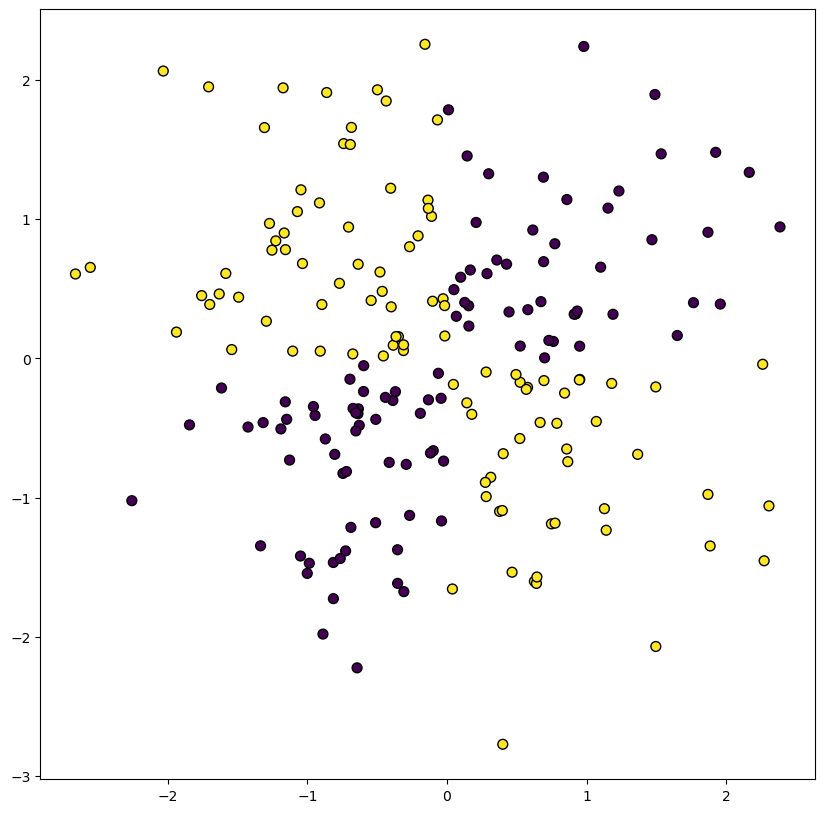

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.viridis, edgecolors=(0, 0, 0))

## Generate a grid of 50x50 points for testing

In [7]:
# build the testpoints 
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),np.linspace(-3, 3, 50))
test_points = np.vstack((xx.ravel(), yy.ravel())).T
print(xx.shape,yy.shape,test_points.shape)

(50, 50) (50, 50) (2500, 2)


## Do kernel regression using all the points as landmarks
- use the Gaussian kernel exp(-||x-x'||^2/2s^2) where s is the kernel width
- construct the kernel matrix K (hint: the function pdist in scipy.spatial.distance might be helpful). Use euclidean distance as your metric. Ignore the bias term (column of 1s) in the construction of K. So K will be of size 200 x 200
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform (to convert pdist matrix to square)
- build a logistic regresion model using K as your data matrix and y as your label vector (use defaults for the LogisticRegression() call).
   - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- construct the kernel matrix corresponding to the test points using the training set landmarks (see cdist)
   - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
- predict class probabilities for the test points (use .predict_proba() for the logistic classifier)
- reshape the predicted values array into a 50x50 grid
- plot the decision boundary using the given function

In [ ]:
##### START YOUR CODE
s = 2.0 # kernel width (you can play with this parameter)

# build the kernel matrix on training data (about 2 lines of vectorized code)

# build a logistic model on the kernel matrix (2 lines of code) using sklearn's LogisticRegression()

# construct the kernel representation of the test_points with the training set landmarks
# hint: consider using cdist in scipy.spatial.distance (about 2-3 lines of code)

# use your learned model to predict using the kernel representation.
# Store the predictions in array Z (1 line of code)

##### END YOUR CODE

# reshape Z into a 50x50 grid
Z = Z.reshape(xx.shape)

In [ ]:
plot_boundary(Z,X,y,xx,yy)

## Kernel regression using clustering to select landmarks
- run Kmeans on the original data to build N clusters (N=30). You can vary this and study its impact.
- Use the cluster centers as landmarks for building the kernel representation. That is, construct the kernel matrix K (hint: the function cdist in scipy.spatial.distance might be helpful). Use euclidean distance as your metric. Ignore the bias term (column of 1s) in the construction of K. So K will be of size N x N
- build a logistic regresion model using K as your data matrix and y as your label vector
- construct the kernel matrix corresponding to the test points using the training set landmarks (using cdist)
- predict class probabilities for the test points
- reshape the predicted values array into a 50x50 grid
- plot the decision boundary using the given function

In [ ]:
N = 10
kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.viridis, edgecolors=(0, 0, 0))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='red' )

In [ ]:
##### START YOUR CODE
s = 1.5 # kernel width (play with this parameter)

# build the kernel matrix with the kmeans cluster centers (2 lines of code)

# build a logistic model on the kernel matrix (2 lines of code)

# build a kernel representation of the test points with the kmeans cluster centers (2 lines of code)

# Predict probabilities on the testpoints (1 line of code)

##### END YOUR CODE

Z = Z.reshape(xx.shape)

In [ ]:
plot_boundary(Z,X,y,xx,yy)

## Kernel regression with strategically chosen kernels
- Use the specified centers as landmarks for building the kernel representation. That is, construct the kernel matrix K (hint: the function cdist in scipy.spatial.distance might be helpful). Ignore the bias term (column of 1s) in the construction of K. So K will be of size 4 x 4.
- build a logistic regresion model using K as your data matrix and y as your label vector
- construct the kernel matrix corresponding to the test points using the training set landmarks
- predict class probabilities for the test points
- reshape the predicted values array into a 50x50 grid
- plot the decision boundary using the given function

In [ ]:
centers = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.viridis, edgecolors=(0, 0, 0))
plt.scatter(centers[:,0],centers[:,1], s=100, c='red' )

In [ ]:
#### START YOUR CODE

s = 1.5 # kernel width (play with this parameter)

#build the kernel matrix with respect to the new landmarks (2 lines of code)

# build a logistic model on the kernel matrix (2 lines of code)

# build a kernel representation of the test points (2 lines of code)

# predict on the testpoints (1 line of code)

#### END YOUR CODE

Z = Z.reshape(xx.shape)

# Comment on the results above
- how does landmark choice affect the quality of the decision boundary learned?
- how does the choice of kernel width affect the quality of the decision boundary learned?
